In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('Final_Train_DoctorFees.csv')
df_test=pd.read_csv('Final_Test_DoctorFees.csv')

In [4]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
df_train.shape

(5961, 7)

In [7]:
duplicate_rows=df_train[df_train.duplicated()]
print(duplicate_rows.shape)

(40, 7)


In [8]:
df_train.drop_duplicates().shape

(5921, 7)

Dropping duplicate rows having all the column values same

In [9]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [11]:
for column in df_train.columns:
    if df_train[column].dtypes==object:
        print(str(column)+':'+str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('************************************************************************************************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                                                                 488
BHMS                                                                                                                                                477
BAMS                                                                                                                                                471
MBBS                                                                                                                                                334
MBBS, MS - ENT                      

In [12]:
df_train.isnull().values.any()

True

In [13]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There are total 3302, 25 and 2620 null values are present in Rating, Place and Miscellaneous_Info columns respectively

In [14]:
columns=['Place','Rating','Miscellaneous_Info']
for column in columns:
    df_train[column].fillna(df_train[column].mode()[0],inplace=True)

Since all the null value containing columns are of object datatype, so here I have used mode of the columns to fill null values

In [15]:
df_train.isnull().values.any()

False

In [16]:
df_train['Experience'] = df_train['Experience'].str.replace(r'\D', '').astype(int)

In [17]:
df_train['Rating'] = df_train['Rating'].str.replace(r'\D', '').astype(int)

Since both Experience and Rating column includes values with mix(int+char) datatype and % signs respectively, here I have used pandas replace method to convert these into the string format, so the model can be trained on integer values.

Univariate Analysis

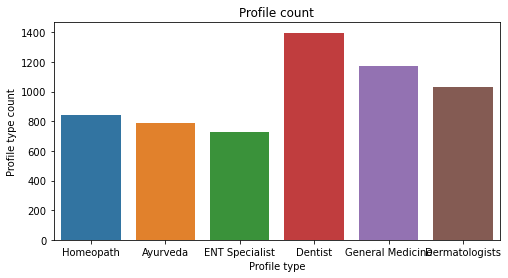

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [18]:
plt.subplots(figsize=(8,4))
sns.countplot(x='Profile',data=df_train)
plt.title('Profile count')
plt.xlabel('Profile type')
plt.ylabel('Profile type count')
plt.show()

print(df_train['Profile'].value_counts())

From above countplot we observe that Dentist and ENT Specialist are highest and lowest respectively in counts in dataset

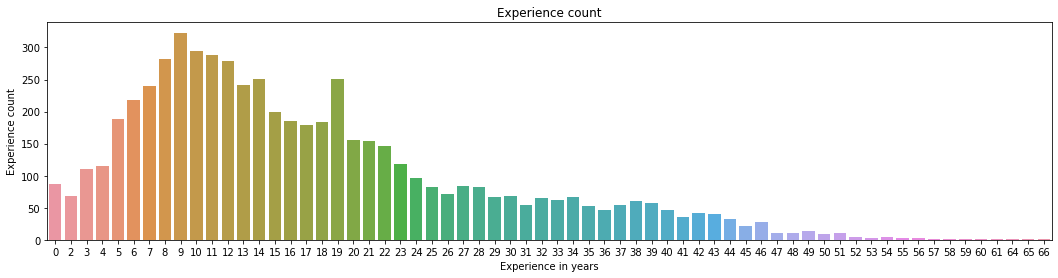

In [19]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=df_train)
plt.title('Experience count')
plt.xlabel('Experience in years')
plt.ylabel('Experience count')
plt.show()

From above plot we observe that the doctors with an experience of 9 years and that of more than 56 years are highest and lowest in counts respectively

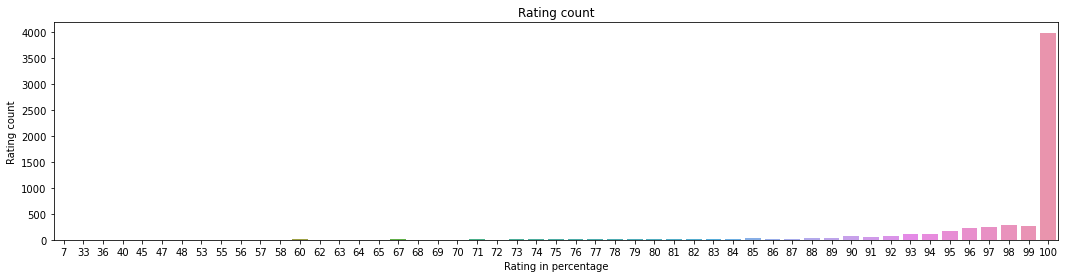

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64


In [20]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=df_train)
plt.title('Rating count')
plt.xlabel('Rating in percentage')
plt.ylabel('Rating count')
plt.show()

print(df_train['Rating'].value_counts())

From above plot and data we observe that the doctor's count is comparatively very high with 100 rating and there are very less counts below 93 rating

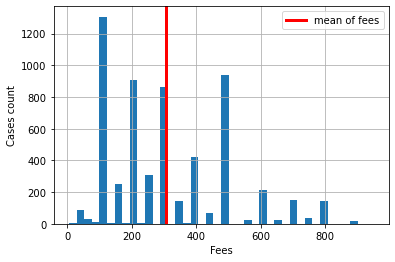

In [21]:
Fees=df_train['Fees'].hist(bins=40)
mean_fees=np.mean(df_train['Fees'])
plt.axvline(mean_fees,linewidth=3,color='red',label='mean of fees')
plt.xlabel('Fees')
plt.ylabel('Cases count')
plt.legend()
plt.show()

Bivariate - Analysis

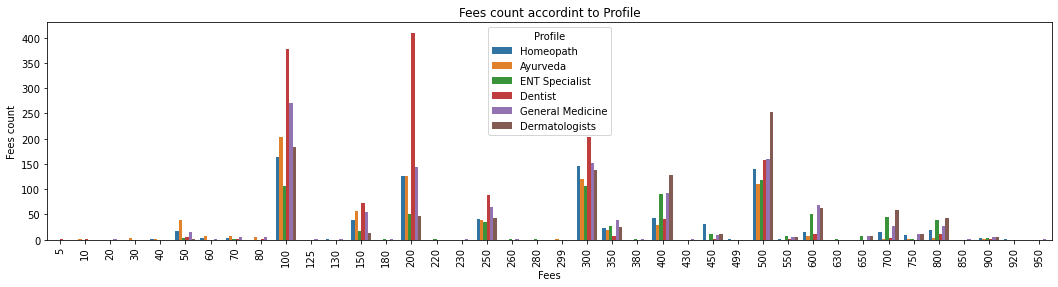

Fees  Profile         
5     Dentist             1
10    Ayurveda            1
      Dentist             1
20    General Medicine    1
30    Ayurveda            4
                         ..
900   Homeopath           3
      Ayurveda            1
      Dentist             1
920   Homeopath           1
950   General Medicine    1
Name: Profile, Length: 133, dtype: int64


In [22]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Fees',hue='Profile',data=df_train)
plt.title('Fees count accordint to Profile')
plt.xticks(rotation='vertical')
plt.ylabel('Fees count')
plt.show()

print(df_train.groupby('Fees')['Profile'].value_counts())

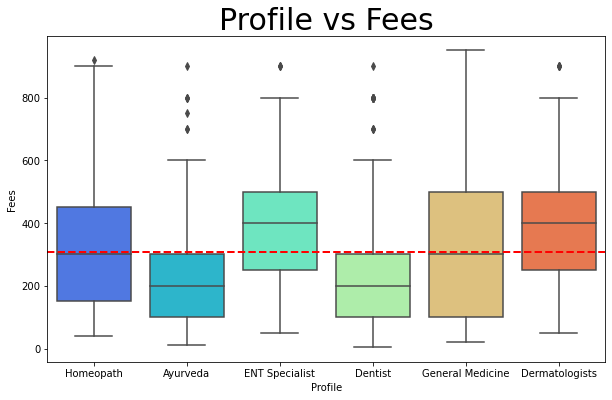

In [23]:
plt.figure(figsize=(10,6))
mean_fees=np.mean(df_train['Fees'])
sns.boxplot(y='Fees',x='Profile',data=df_train,palette='rainbow')
plt.axhline(mean_fees,color='r',linestyle='dashed',linewidth=2)
plt.title('Profile vs Fees',fontsize=30)
plt.xticks(rotation='0')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Qualification','Place','Profile']
for column in columns:
    df_train[column]=le.fit_transform(df_train[column])

Above I have label encoded the object datatype columns, so I can better analyse problem type.

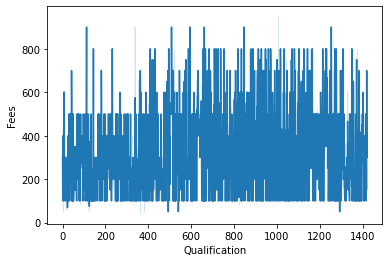

In [25]:
sns.lineplot(x='Qualification',y='Fees',data=df_train)
plt.show()

Above I have plotted Qualification Vs Fees to exactly know the kind of Machine learning problem it is, as Qualification is comparatively better correlated with Fees so we can analyse the type of problem i.e - whether it is Regression or Classification. As the plot shows non-linear relationship between Qualification and Experience, we can understand it is more Classification kind of problem than the linear one.

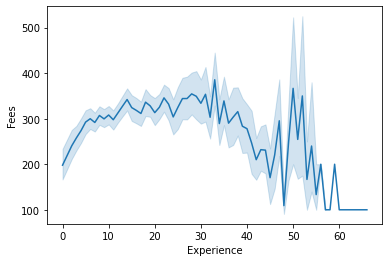

In [26]:
sns.lineplot(x='Experience',y='Fees',data=df_train)
plt.show()

In [27]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24,100,299,5,"100% 16 Feedback Kakkanad, Ernakulam",100
1,73,12,98,866,0,"98% 76 Feedback Whitefield, Bangalore",350
2,1135,9,100,457,3,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,464,12,100,68,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,10,20,100,337,0,"100% 4 Feedback Keelkattalai, Chennai",250


In [28]:
df_train['Miscellaneous_Info']=le.fit_transform(df_train['Miscellaneous_Info'])

Summary Statistics

In [29]:
df_train.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,97.610636,414.368059,2.441872,1573.343902,307.944640
std,413.842446,11.142798,5.881539,258.547684,1.658014,640.388185,190.920373
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,9.000000,98.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,14.000000,100.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,23.000000,100.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,66.000000,100.000000,876.000000,5.000000,2997.000000,950.000000


Correlation Analysis

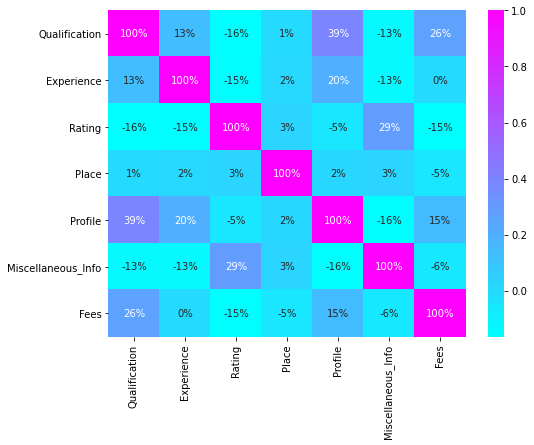

In [30]:
plt.figure(figsize=(8,6))
cor=df_train.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Observations:

1. There is no high correlation between any of two features.
2. There is a moderate correlation between Profile-Qualification,Qualification-Fees,Experience-Profile attributes.

Correlation with Target

Text(0.5, 1.0, 'correlation with target variable')

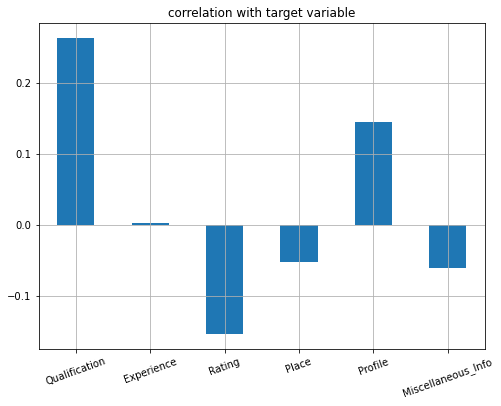

In [31]:
plt.figure(figsize=(8,6))
df_train.drop('Fees',axis=1).corrwith(df_train['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

Observations:

1. There is most positive correlation of Qualification with Target (Fees)
2. There is most negative correlation of Rating with Target (Fees)
3. There is no correlation between Experience and Fees

In [32]:
df_train.drop(columns=['Experience'],axis=1,inplace=True)

Above I have dropped Experience column because it has 0 correlation with Target

Plotting Distribution of Skewness

In [33]:
df_train.skew()

Qualification         0.239720
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.751870
dtype: float64

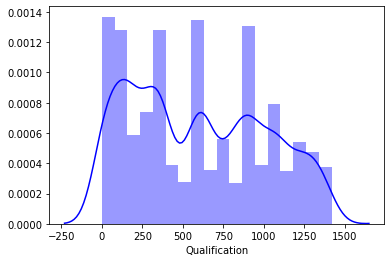

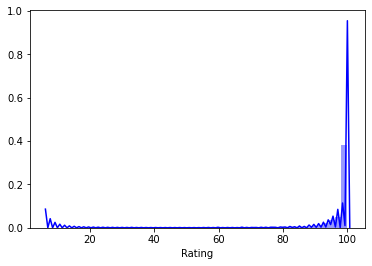

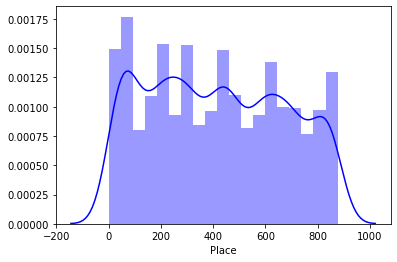

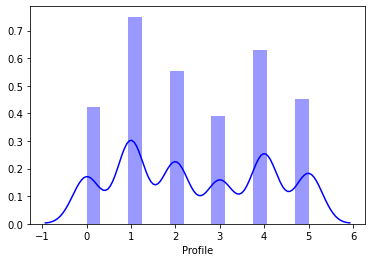

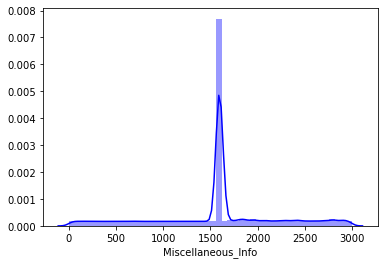

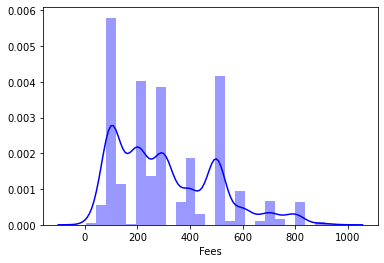

In [34]:
for col in df_train.describe().columns:
    sns.distplot(df_train[col],color='b')
    plt.show()

Observations:

1. There is positive (Right) skewness present in Qualification and Fees columns. i.e Mean>Median
2. In Rating column data is highly saturated at single point and there is some negative(left) skewness i.e Median>Mean
3. Place column has comparatively uniform distribution and profile column has perfectly categorical values

Detecting Outliers

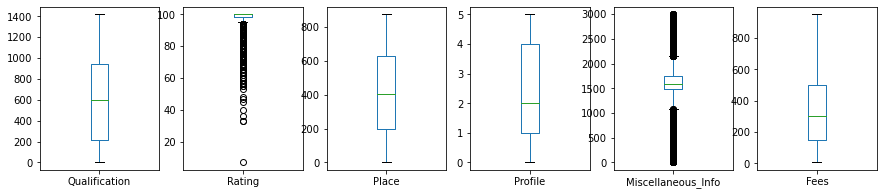

In [35]:
axs = df_train.plot(kind='box',subplots=True,figsize=(15,3))

From above plots we observe that there are very high no of outliers present in Miscellaneous_Info column of the dataset. Also, in Rating column there is extreme difference between the highest and lowest values.

Removing Outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df_train['Miscellaneous_Info']))
df_train['Miscellaneous_Info']=df_train['Miscellaneous_Info'][(z<3)]

Above I have removed outliers from Miscellaneous_Info column only because it permits to do so, but in Rating while doing this null value comes, so considering it as the valuable property and factual data, I have left it as it is.

In [37]:
df_train.skew()

Qualification         0.239720
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.751870
dtype: float64

In [38]:
df_train['Fees'].unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

Dividing output into only two class labels to better analyse classification problem (Using Panda's cut method)

In [39]:
df_train.Fees=pd.cut(df_train.Fees,[0,400,950],labels=[0,1])

In [40]:
x=df_train.drop(columns=['Fees'],axis=1)

In [41]:
y=df_train['Fees']
y.value_counts()

0    4346
1    1615
Name: Fees, dtype: int64

In [42]:
x.skew()

Qualification         0.239720
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
dtype: float64

Normalization and Standardization of Input before giving it for the Model training

In [43]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x=pt.fit_transform(x)
x=pd.DataFrame(x)

In [44]:
x.skew()

0   -0.298616
1   -1.162261
2   -0.263388
3   -0.139151
4   -0.133335
dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

Importing Classifiers, Models and Metrics

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Model Training

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)

In [48]:
print(x_train.shape,'\t\t',x_test.shape)

(4768, 5) 		 (1193, 5)


In [49]:
print(y_train.shape,'\t\t',y_test.shape)

(4768,) 		 (1193,)


In [50]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
model=[lg,dtc,knc,svc,gnb]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',classification_report(y_test,y_pred))
    print('\n')

Score of LogisticRegression() is: 0.7288171140939598
accuracy score: 0.7250628667225482
confusion_matrix: [[856  14]
 [314   9]]
classification_report:               precision    recall  f1-score   support

           0       0.73      0.98      0.84       870
           1       0.39      0.03      0.05       323

    accuracy                           0.73      1193
   macro avg       0.56      0.51      0.45      1193
weighted avg       0.64      0.73      0.63      1193



Score of DecisionTreeClassifier() is: 0.9903523489932886
accuracy score: 0.6881810561609388
confusion_matrix: [[691 179]
 [193 130]]
classification_report:               precision    recall  f1-score   support

           0       0.78      0.79      0.79       870
           1       0.42      0.40      0.41       323

    accuracy                           0.69      1193
   macro avg       0.60      0.60      0.60      1193
weighted avg       0.68      0.69      0.69      1193



Score of KNeighborsClassifier() is

From above results we see that SVC() model is performing better than others

GridSearch CV Hyperparameter Tuning

In [52]:
grid_param={'C':[1,10],'random_state':range(42,100)}
gd_sr=GridSearchCV(estimator=lg,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'C': 1, 'random_state': 42}


In [53]:
grid_param={'criterion':['gini','entropy'],'random_state':range(42,100),'max_depth':[4,5,6,15,20]}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'random_state': 42}


In [54]:
grid_param={'n_neighbors':range(1,100)}
gd_sr=GridSearchCV(estimator=knc,param_grid=grid_param)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'n_neighbors': 49}


In [51]:
lg=LogisticRegression(C=1,random_state=42)
lg.fit(x_train,y_train)
print('Score of',lg,'is:',lg.score(x_train,y_train))
y_pred=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of LogisticRegression(C=1, random_state=42) is: 0.7288171140939598
accuracy score: 0.7250628667225482
confusion matrix: [[856  14]
 [314   9]]
classification report:               precision    recall  f1-score   support

           0       0.73      0.98      0.84       870
           1       0.39      0.03      0.05       323

    accuracy                           0.73      1193
   macro avg       0.56      0.51      0.45      1193
weighted avg       0.64      0.73      0.63      1193



In [52]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=5)
dtc.fit(x_train,y_train)
print('Score of',dtc,'is:',dtc.score(x_train,y_train))
y_pred=dtc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of DecisionTreeClassifier(max_depth=5, random_state=42) is: 0.7558724832214765
accuracy score: 0.7401508801341157
confusion matrix: [[836  34]
 [276  47]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.96      0.84       870
           1       0.58      0.15      0.23       323

    accuracy                           0.74      1193
   macro avg       0.67      0.55      0.54      1193
weighted avg       0.71      0.74      0.68      1193



In [53]:
svc=SVC(kernel='rbf',C=10)
svc.fit(x_train,y_train)
print('Score of',svc,'is:',svc.score(x_train,y_train))
y_pred=svc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of SVC(C=10) is: 0.7575503355704698
accuracy score: 0.7275775356244761
confusion matrix: [[818  52]
 [273  50]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.94      0.83       870
           1       0.49      0.15      0.24       323

    accuracy                           0.73      1193
   macro avg       0.62      0.55      0.53      1193
weighted avg       0.68      0.73      0.67      1193



In [54]:
knc=KNeighborsClassifier(n_neighbors=49)
knc.fit(x_train,y_train)
print('Score of',knc,'is:',knc.score(x_train,y_train))
y_pred=knc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of KNeighborsClassifier(n_neighbors=49) is: 0.746015100671141
accuracy score: 0.7250628667225482
confusion matrix: [[821  49]
 [279  44]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.94      0.83       870
           1       0.47      0.14      0.21       323

    accuracy                           0.73      1193
   macro avg       0.61      0.54      0.52      1193
weighted avg       0.67      0.73      0.67      1193



Cross Validation of Scores

In [55]:
model=[LogisticRegression(C=1,random_state=42),DecisionTreeClassifier(max_depth=5, random_state=42),SVC(C=10),KNeighborsClassifier(n_neighbors=49),GaussianNB()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.71105528 0.72864322 0.73115578 0.73115578 0.72613065 0.72864322
 0.73299748 0.73047859 0.74055416 0.70780856 0.73047859 0.73299748
 0.73047859 0.7279597  0.7279597 ]
mean score and standard deviation of LogisticRegression(C=1, random_state=42) is 0.7278997843963729 0.007936820599444477


[0.74874372 0.73366834 0.73366834 0.72110553 0.73115578 0.7361809
 0.7581864  0.74055416 0.75566751 0.76322418 0.75314861 0.75062972
 0.72544081 0.74055416 0.76322418]
mean score and standard deviation of DecisionTreeClassifier(max_depth=5, random_state=42) is 0.7436768223991493 0.013056432116603641


[0.73366834 0.73366834 0.73115578 0.72110553 0.72361809 0.73115578
 0.74307305 0.74055416 0.74055416 0.74307305 0.73551637 0.73299748
 0.73803526 0.73551637 0.75314861]
mean score and standard deviation of SVC(C=10) is 0.7357893582100258 0.007666092191049475


[0.75628141 0.72361809 0.72361809 0.71356784 0.71859296 0.74371859
 0.73551637 0.73803526 0.75062972 0.73803526 0.74559194 0.73551637
 0.7254408

Ensembling Techniques to Boost up the Score

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))
    print('*****************************************************************************************************************')
    print('\n')

Score of RandomForestClassifier() is: 0.9903523489932886
accuracy score: 0.7225481978206203
confusion matrix: [[758 112]
 [219 104]]
classification report:               precision    recall  f1-score   support

           0       0.78      0.87      0.82       870
           1       0.48      0.32      0.39       323

    accuracy                           0.72      1193
   macro avg       0.63      0.60      0.60      1193
weighted avg       0.70      0.72      0.70      1193

*****************************************************************************************************************


Score of AdaBoostClassifier() is: 0.7527265100671141
accuracy score: 0.7426655490360435
confusion matrix: [[830  40]
 [267  56]]
classification report:               precision    recall  f1-score   support

           0       0.76      0.95      0.84       870
           1       0.58      0.17      0.27       323

    accuracy                           0.74      1193
   macro avg       0.67      0.

From above results we can see that GradientBoostingClassifier() is performing better than others

Cross Validation Scores -

In [58]:
model=[RandomForestClassifier(max_depth=6,n_estimators=500),AdaBoostClassifier(),GradientBoostingClassifier(max_depth=6,n_estimators=500),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.74623116 0.73366834 0.75125628 0.72361809 0.72361809 0.73366834
 0.74307305 0.74307305 0.75566751 0.76322418 0.74559194 0.74055416
 0.73803526 0.75062972 0.76322418]
mean score and standard deviation of RandomForestClassifier(max_depth=6, n_estimators=500) is 0.743675556624432 0.011751057858277313


[0.74371859 0.72110553 0.74874372 0.73115578 0.70603015 0.73366834
 0.75566751 0.75062972 0.76070529 0.76322418 0.7581864  0.74055416
 0.73047859 0.75566751 0.73803526]
mean score and standard deviation of AdaBoostClassifier() is 0.7425047150108224 0.015541368921112266


[0.78643216 0.74120603 0.75125628 0.7361809  0.72613065 0.77135678
 0.77329975 0.79093199 0.80856423 0.77833753 0.75314861 0.71788413
 0.75314861 0.75566751 0.73551637]
mean score and standard deviation of GradientBoostingClassifier(max_depth=6, n_estimators=500) is 0.7586041036416339 0.024841932958038437


[0.72361809 0.71356784 0.70854271 0.72110553 0.69346734 0.71859296
 0.71536524 0.72292191 0.72292191 0.74307305 0.7

From above scores we have CVS for GradientBoostingClassifier() highest

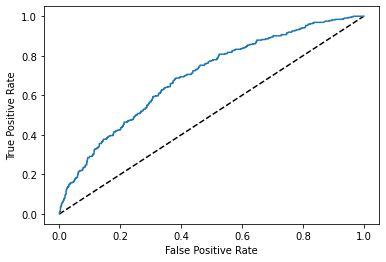

0.5543183516600833


In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rfc=RandomForestClassifier(max_depth=6, n_estimators=500)
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predrf)
print(auc_score)

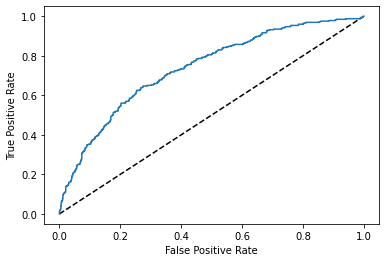

0.6313832247962705


In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
gd=GradientBoostingClassifier(max_depth=6, n_estimators=500)
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
y_pred_prob=gd.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predgd)
print(auc_score)

Saving GradientBoostingClassifier() as the best model

In [66]:
import joblib
file='docfeegd.pkl'
joblib.dump(gd,file)

['docfeegd.pkl']

Test Data Analysis and Saved Model's predictions

In [67]:
df_test.shape

(1987, 6)

In [68]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [69]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [70]:
columns=['Place','Rating','Miscellaneous_Info']
for column in columns:
    df_test[column].fillna(df_test[column].mode()[0],inplace=True)

In [71]:
df_test.isnull().values.any()

False

In [73]:
df_test['Experience'] = df_test['Experience'].str.replace(r'\D', '').astype(int)

In [74]:
df_test['Rating'] = df_test['Rating'].str.replace(r'\D', '').astype(int)

In [75]:
duplicate_rows=df_test[df_test.duplicated()]
print(duplicate_rows.shape)

(11, 6)


In [76]:
df_test.drop_duplicates().shape

(1976, 6)

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Qualification','Place','Profile','Miscellaneous_Info']
for column in columns:
    df_test[column]=le.fit_transform(df_test[column])

Summary Statistics

In [78]:
df_test.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,17.874685,97.490689,288.894313,2.508807,573.318067
std,185.961177,11.366764,5.793117,174.094298,1.654223,238.453687
min,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,98.000000,137.000000,1.000000,494.500000
50%,241.000000,15.000000,100.000000,289.000000,2.000000,598.000000
75%,417.000000,24.000000,100.000000,439.000000,4.000000,636.500000
max,629.000000,65.000000,100.000000,591.000000,5.000000,1083.000000


Observations:
    
    1. min and max Experience is 0 and 65 respectively
    2. min and max Rating is 52 and 98 respectively

Correlation Analysis

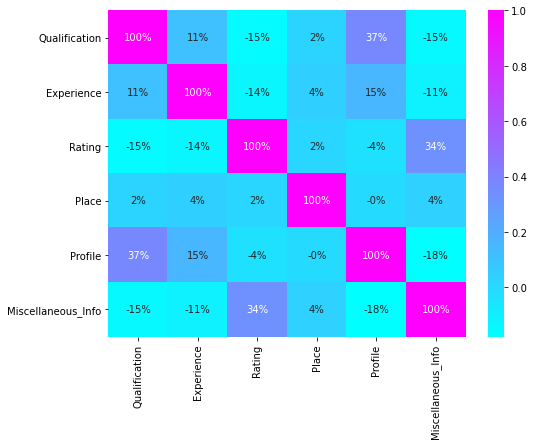

In [79]:
plt.figure(figsize=(8,6))
cor=df_test.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Plotting Distribution of Skewness

In [80]:
df_test.skew()

Qualification         0.280822
Experience            0.963447
Rating               -3.824326
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

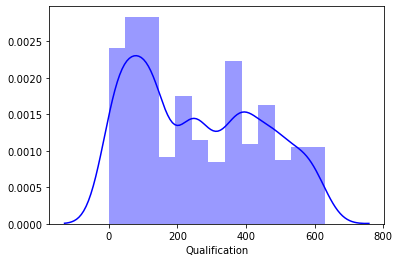

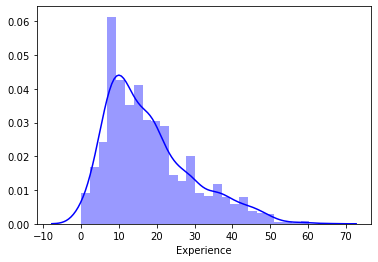

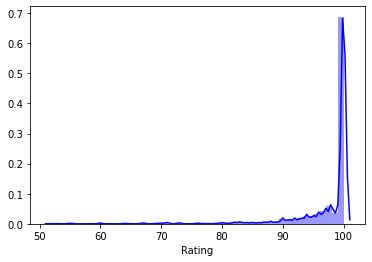

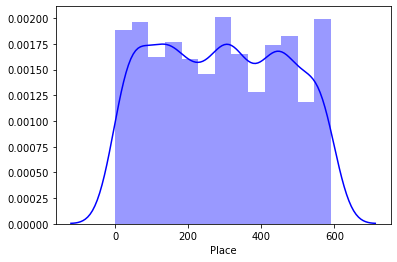

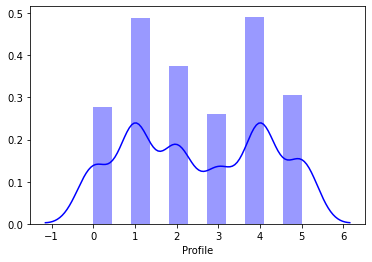

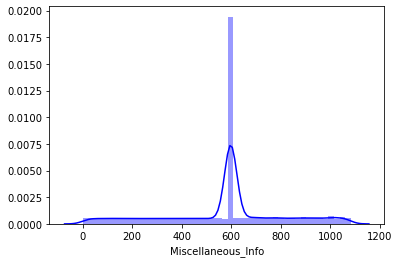

In [81]:
for col in df_test.describe().columns:
    sns.distplot(df_test[col],color='b')
    plt.show()

Detecting Outliers

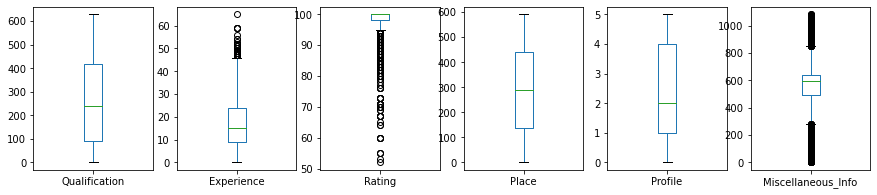

In [82]:
axs = df_test.plot(kind='box',subplots=True,figsize=(15,3))

In [83]:
df_test.drop(columns=['Experience'],axis=1,inplace=True)

Removing Outliers

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(df_test['Miscellaneous_Info']))
df_test['Miscellaneous_Info']=df_test['Miscellaneous_Info'][(z<3)]

Normalization and Standardization

In [85]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_test=pt.fit_transform(df_test)
df_test=pd.DataFrame(df_test)

In [86]:
df_test.skew()

0   -0.264189
1   -1.108972
2   -0.285897
3   -0.162395
4   -0.192507
dtype: float64

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_test=sc.fit_transform(df_test)
df_test=pd.DataFrame(df_test)

Loading previously saved model for the prediction from Test data

In [88]:
loadfile=joblib.load('docfeegd.pkl')

In [89]:
predtest_gd=loadfile.predict(df_test)

In [90]:
predtest_gd=pd.DataFrame(predtest_gd)
predtest_gd

,0
0,0
1,0
2,0
3,0
4,0
...,...
1982,1
1983,1
1984,1
1985,0
